In [12]:
# Importing packages and ignoring warnings 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Importing datasets and reading them through pandas package
color = sns.color_palette()
test_url = "https://raw.githubusercontent.com/artemedius/repo/main/houseprice%20forecast/test.csv"
train_url = "https://raw.githubusercontent.com/artemedius/repo/main/houseprice%20forecast/train.csv"
test = pd.read_csv(test_url)
train = pd.read_csv(train_url)

# Saving Id column and deleting from dataframes, they're irrelevant for regression
train_id = train['Id']
test_id = test['Id']
train = train.drop("Id", axis = 1)
test = test.drop("Id", axis = 1)

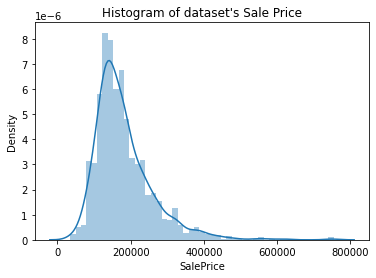

In [13]:
sns.distplot(train['SalePrice'])
plt.title("Histogram of dataset's Sale Price")
plt.show()

Sale Price is skewed, shows peakedness, therefore, deviates from normal distribution.
So, there must be outliers that we can eliminate.

In [14]:
def detect_outlier(df):
    threshold=3
    mean = np.mean(df)
    std = np.std(df)
    outliers=[]

    for y in df:
        z_score= (y - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
area_outliers = detect_outlier(train['GrLivArea'])
outlier_df = pd.DataFrame(train[train['GrLivArea'].isin(area_outliers)])

[3222, 3608, 3112, 3493, 3228, 4676, 3194, 3395, 4316, 3279, 3140, 3627, 4476, 3447, 5642, 3238]


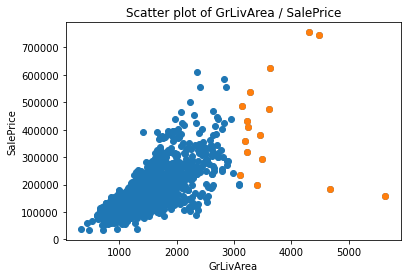

In [15]:
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
ax.scatter(x=outlier_df['GrLivArea'], y=outlier_df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.title('Scatter plot of GrLivArea / SalePrice')
print(area_outliers)
plt.show()

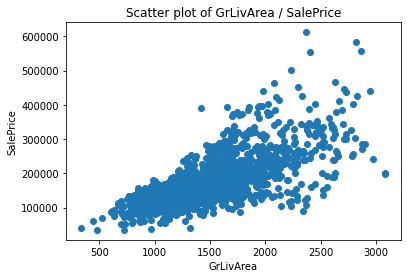

In [16]:
train = train[~train['GrLivArea'].isin(area_outliers)]
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.title('Scatter plot of GrLivArea / SalePrice')
plt.show()